In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import warnings

%matplotlib inline

In [171]:
df = pd.read_csv("data/daily-revenue.csv", )
df.head()

,Date,Revenue
0,"January 1, 2018",439624.94
1,"January 2, 2018",3252465.46
2,"January 3, 2018",4764283.74
3,"January 4, 2018",4482056.07
4,"January 5, 2018",4110930.37


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
Date       424 non-null object
Revenue    424 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB


In [202]:
df['Date'] = pd.to_datetime(df['Date'] )


In [207]:
startindex =  df['Date'][0]
s = datetime.combine(startindex ,datetime.time(datetime.now()))
s.strftime('%Y-%m-%d %H:%m')

'2018-01-01 08:01'

In [214]:
## add time to date componenet as needed for ARIMA Model

startindex =  df['Date']

s=[]
for i in range(len(startindex)):
 s.append(datetime.combine(startindex[i] ,datetime.time(datetime.now())).strftime('%Y-%m-%d %H:%m'))
          
df['DateTime'] = s

df['DateTime'] = pd.to_datetime(df['DateTime'] )

df.head()


,Date,Revenue,DateTime
0,2018-01-01,439624.94,2018-01-01 08:01:00
1,2018-01-02,3252465.46,2018-01-02 08:01:00
2,2018-01-03,4764283.74,2018-01-03 08:01:00
3,2018-01-04,4482056.07,2018-01-04 08:01:00
4,2018-01-05,4110930.37,2018-01-05 08:01:00


In [5]:
df['Month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df['dow']=df['Date'].dt.dayofweek
df.head()


,Date,Revenue,Month,day,dow
0,2018-01-01,439624.94,1,1,0
1,2018-01-02,3252465.46,1,2,1
2,2018-01-03,4764283.74,1,3,2
3,2018-01-04,4482056.07,1,4,3
4,2018-01-05,4110930.37,1,5,4


In [6]:
func = [lambda x: 1 if x==5 or x==6 else 0]
df['weekend']=df['dow'].apply(func)
df.head()

,Date,Revenue,Month,day,dow,weekend
0,2018-01-01,439624.94,1,1,0,0
1,2018-01-02,3252465.46,1,2,1,0
2,2018-01-03,4764283.74,1,3,2,0
3,2018-01-04,4482056.07,1,4,3,0
4,2018-01-05,4110930.37,1,5,4,0


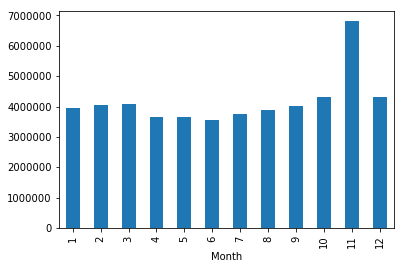

In [7]:
df.groupby('Month')['Revenue'].mean().plot.bar()

## November month see the highest average revenue

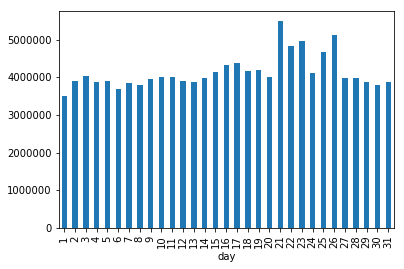

In [8]:
df.groupby('day')['Revenue'].mean().plot.bar()

## Days 21-26 observe highest average revenue

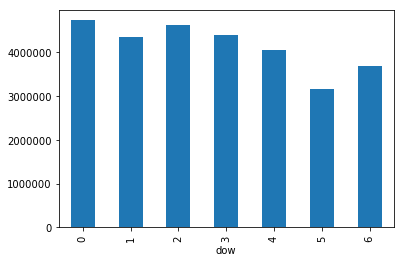

In [9]:
df.groupby('dow')['Revenue'].mean().plot.bar()

## Monday thru Wednesday sees higher revenue vs other days. 

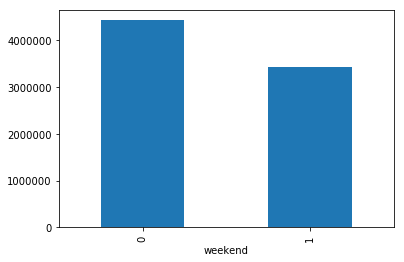

In [10]:
df.groupby('weekend')['Revenue'].mean().plot.bar()

## Weedays have higher revenue vs. Weekend

In [215]:
#df.index = df['Date']
df.index = df['DateTime']

df.drop(['Date', 'DateTime'], axis=1,inplace=True)
df.head()

,Revenue
DateTime,
2018-01-01 08:01:00,439624.94
2018-01-02 08:01:00,3252465.46
2018-01-03 08:01:00,4764283.74
2018-01-04 08:01:00,4482056.07
2018-01-05 08:01:00,4110930.37


## downsample

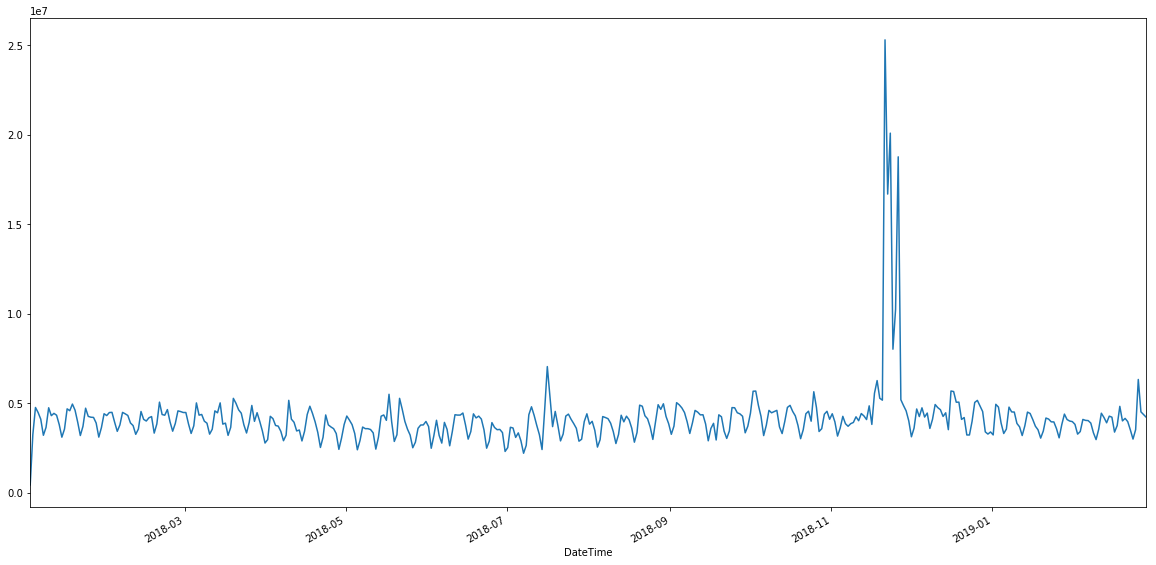

In [216]:
df['Revenue'].plot()

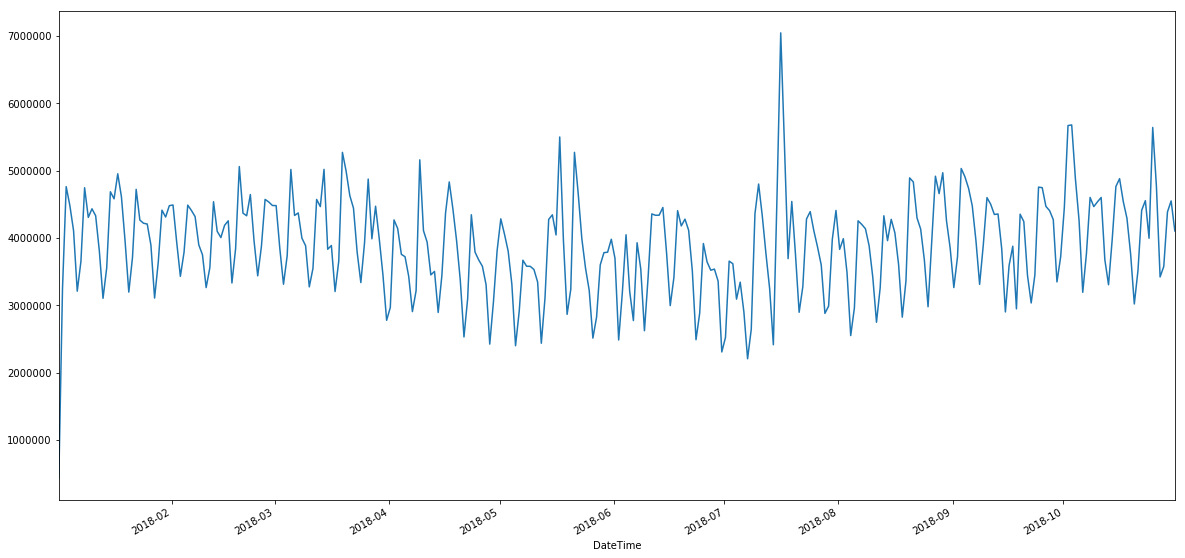

In [217]:
df1 = df[df.index<'2018-11-01' ]
df1['Revenue'].plot()

DateTime
2018-01-07    3.416458e+06
2018-01-14    4.042583e+06
2018-01-21    4.242602e+06
2018-01-28    4.010381e+06
2018-02-04    4.123846e+06
Freq: W-SUN, Name: Revenue, dtype: float64


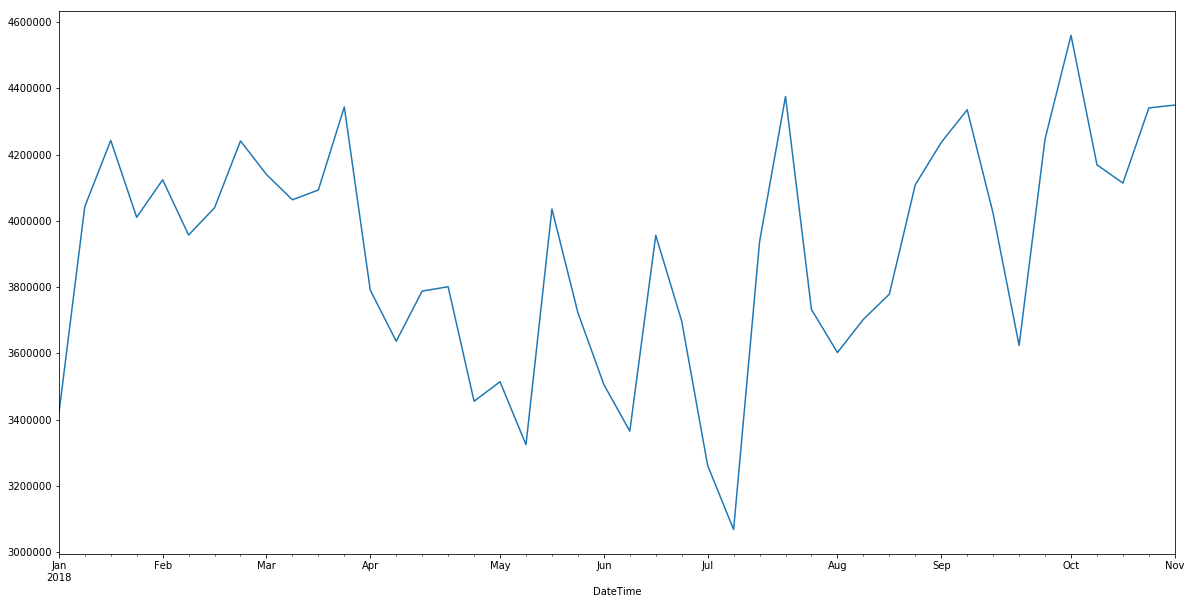

In [250]:
df_weekly = df1['Revenue'].resample('W').mean()
print (df_weekly.head())
df_weekly.plot()

In [219]:
#df_weekly_sum = df1.resample('W').sum()
#print (df_weekly_sum.head())
#df_weekly_sum.plot()

## Naive Approach

In [220]:
df_weekly_df = pd.DataFrame(data= df_weekly.values, index = df_weekly.index)
df_weekly_df.columns= ['Revenue']
df_weekly_df.head()

,Revenue
DateTime,
2018-01-07,3.416458e+06
2018-01-14,4.042583e+06
2018-01-21,4.242602e+06
2018-01-28,4.010381e+06
2018-02-04,4.123846e+06


In [221]:
Train = df_weekly_df.ix[:'2018-10-07']
valid = df_weekly_df.ix['2018-10-14':]

print (Train.head())
print (valid.head())

                 Revenue
DateTime                
2018-01-07  3.416458e+06
2018-01-14  4.042583e+06
2018-01-21  4.242602e+06
2018-01-28  4.010381e+06
2018-02-04  4.123846e+06
                 Revenue
DateTime                
2018-10-14  4.168954e+06
2018-10-21  4.113868e+06
2018-10-28  4.340838e+06
2018-11-04  4.349239e+06


/Users/sulbha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/sulbha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [222]:
Train.values

array([[ 3416457.93285714],
       [ 4042582.92      ],
       [ 4242602.24      ],
       [ 4010380.6       ],
       [ 4123845.73428571],
       [ 3957022.91571429],
       [ 4039272.97714286],
       [ 4241056.30142857],
       [ 4139873.9       ],
       [ 4063314.18142857],
       [ 4093006.78857143],
       [ 4343472.97571429],
       [ 3790730.79714286],
       [ 3636395.33857143],
       [ 3787723.54714286],
       [ 3800885.94571429],
       [ 3455208.93      ],
       [ 3514143.28285714],
       [ 3323979.95      ],
       [ 4035650.60857143],
       [ 3722499.69857143],
       [ 3505777.11857143],
       [ 3364891.59571429],
       [ 3956195.15714286],
       [ 3697008.30571429],
       [ 3261129.74142857],
       [ 3068107.34571429],
       [ 3936644.36571429],
       [ 4375262.21714286],
       [ 3732302.18142857],
       [ 3602261.44428571],
       [ 3702451.69      ],
       [ 3778460.75428572],
       [ 4108788.33285714],
       [ 4236441.99285714],
       [ 4335128.074

In [223]:
import numpy as np

dd= np.asarray(Train['Revenue']) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 


In [224]:
y_hat

,Revenue,naive
DateTime,,
2018-10-14,4.168954e+06,4.559877e+06
2018-10-21,4.113868e+06,4.559877e+06
2018-10-28,4.340838e+06,4.559877e+06
2018-11-04,4.349239e+06,4.559877e+06


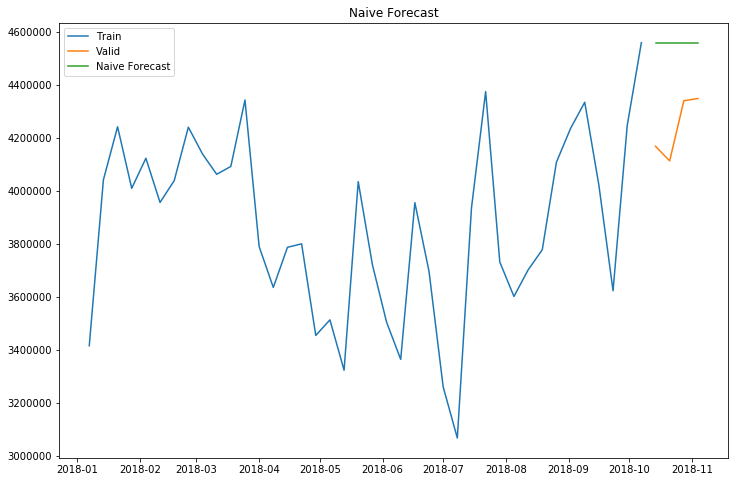

In [225]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train.Revenue, label='Train') 
plt.plot(valid.index,valid.Revenue, label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [226]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Revenue, y_hat.naive)) 
print(rms)

333200.59857414686


## Moving Average

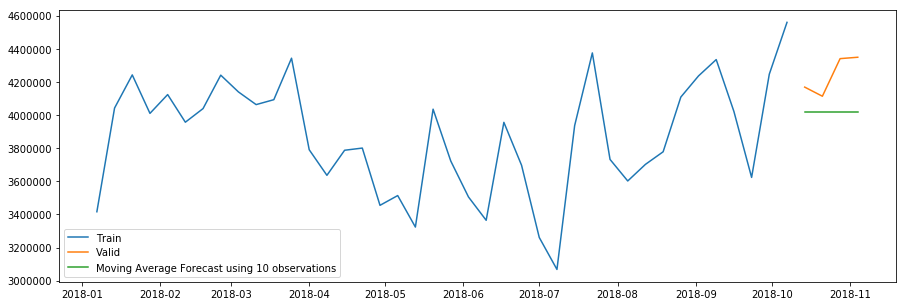

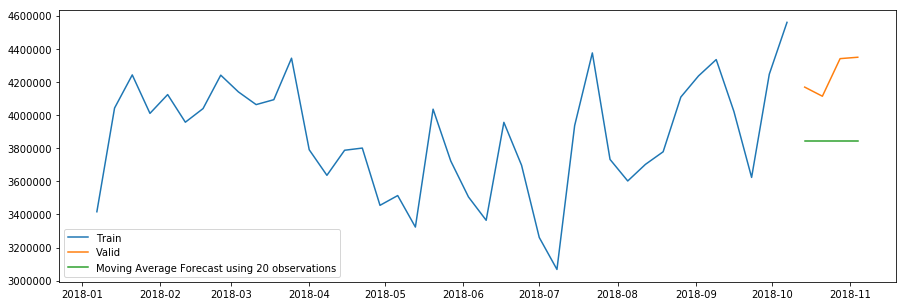

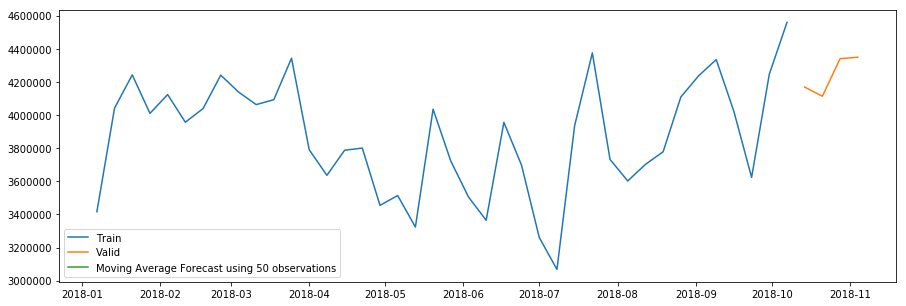

In [227]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Revenue'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Revenue'], label='Train') 
plt.plot(valid['Revenue'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Revenue'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Revenue'], label='Train') 
plt.plot(valid['Revenue'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Revenue'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Revenue'], label='Train') 
plt.plot(valid['Revenue'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

## using 10 observation predicted value closer to mean


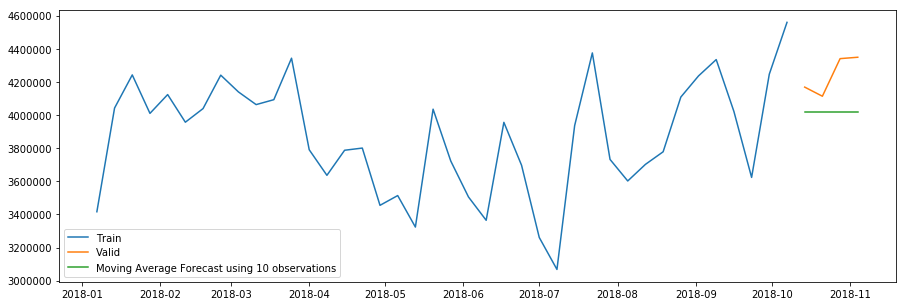

244678.83309581626


In [228]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Revenue'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Revenue'], label='Train') 
plt.plot(valid['Revenue'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show()

# model evaluation
rms = sqrt(mean_squared_error(valid.Revenue, y_hat_avg.moving_avg_forecast)) 
print(rms)


In [229]:
# moving average

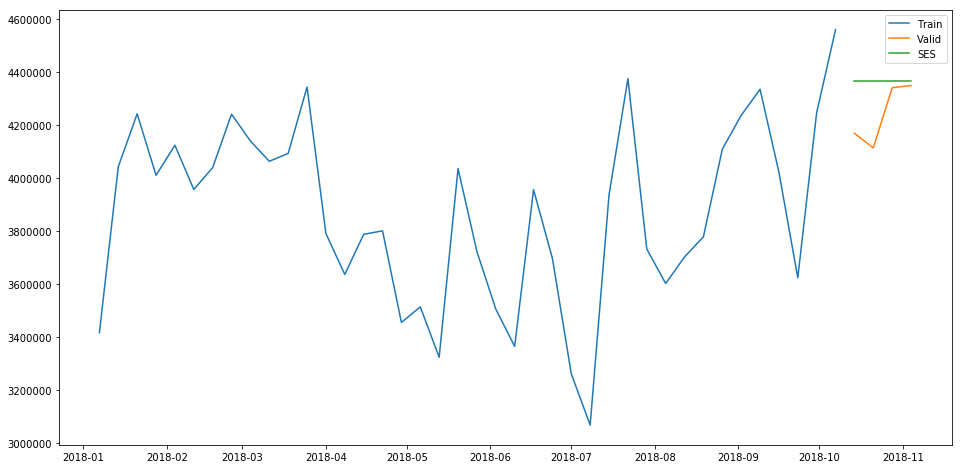

In [230]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Revenue'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Revenue'], label='Train') 
plt.plot(valid['Revenue'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [231]:
rms = sqrt(mean_squared_error(valid.Revenue, y_hat_avg.SES)) 
print(rms)

161015.96170049004


## Holt's Linear Exponential 

In [232]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(df.Revenue).plot() 
result = sm.tsa.stattools.adfuller(df.Revenue) 
plt.show()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

In [ ]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Revenue'])).fit(smoothing_level = 0.2,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Revenue'], label='Train') 
plt.plot(valid['Revenue'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(valid.Revenue, y_hat_avg.Holt_linear)) 
print(rms)


# holt winter

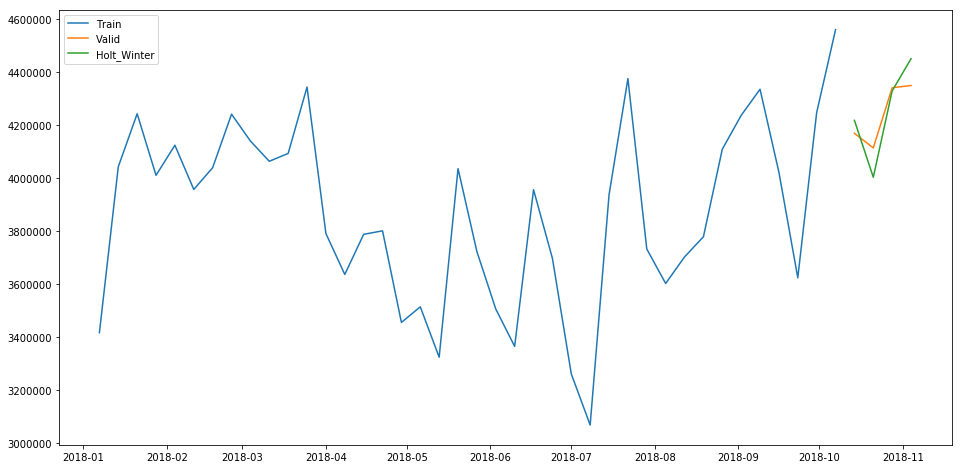

In [233]:
y_hat_avg = valid.copy() 
fit1 = ExponentialSmoothing(np.asarray(Train['Revenue']) ,seasonal_periods=4 ,trend='add', seasonal='mul',).fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['Revenue'], label='Train') 
plt.plot(valid['Revenue'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [234]:
rms = sqrt(mean_squared_error(valid.Revenue, y_hat_avg.Holt_Winter)) 
print(rms)


79094.6301274462


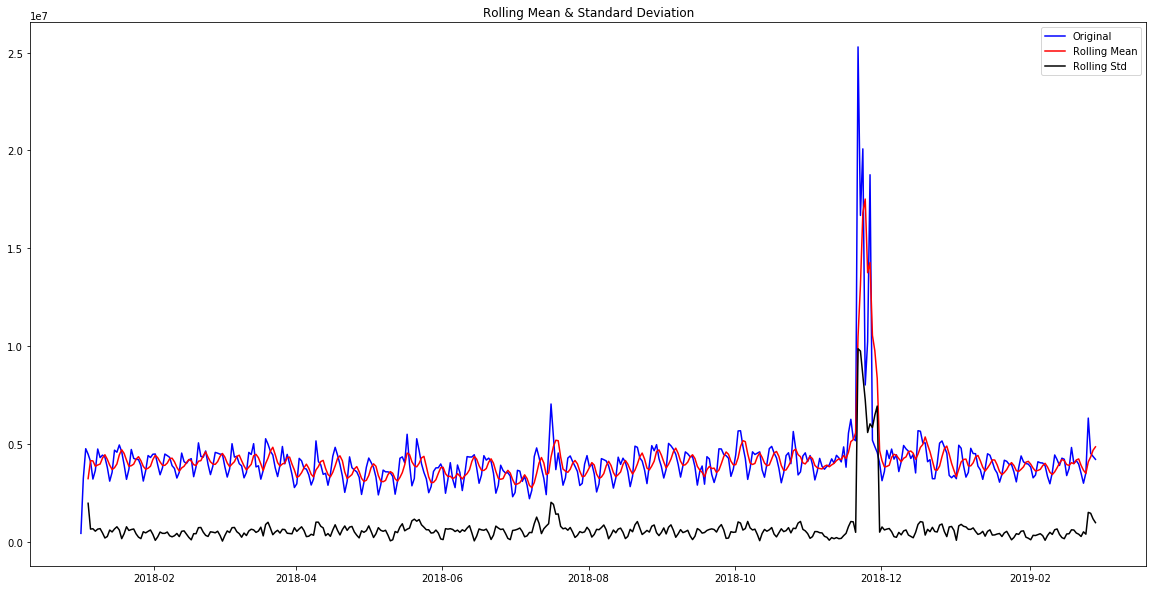

Results of Dickey-Fuller Test:
Test Statistic                  -4.490455
p-value                          0.000205
#Lags Used                      15.000000
Number of Observations Used    408.000000
Critical Value (1%)             -3.446480
Critical Value (5%)             -2.868650
Critical Value (10%)            -2.570557
dtype: float64


In [235]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = timeseries.rolling(4).mean() # 24 hours on each day
    rolstd = timeseries.rolling(4).std() #, window=24)
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(df['Revenue'])

Removing Trend
A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.

We see an increasing trend in the data so we can apply transformation which penalizes higher values more than smaller ones, for example log transformation.

We will take rolling average here to remove the trend. We will take the window size of 24 based on the fact that each day has 24 hours.


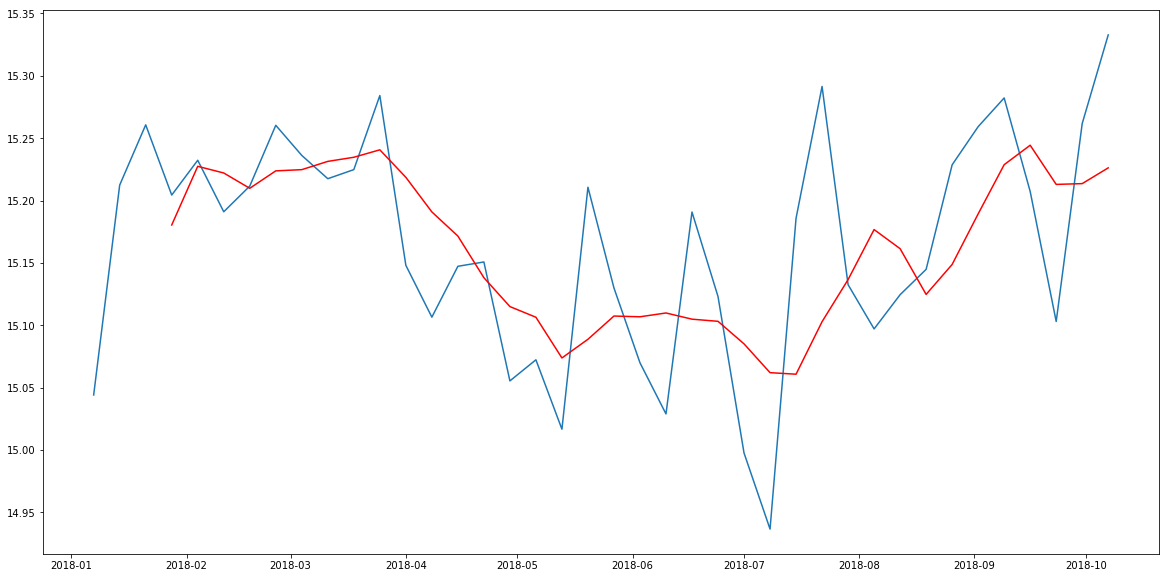

In [237]:

Train_log = np.log(Train['Revenue']) 
valid_log = np.log(valid['Revenue'])
moving_avg = Train_log.rolling(4).mean() 
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [238]:
train_log_moving_avg_diff = Train_log - moving_avg

In [239]:
train_log_moving_avg_diff[train_log_moving_avg_diff.isna()]

DateTime
2018-01-07   NaN
2018-01-14   NaN
2018-01-21   NaN
Freq: W-SUN, Name: Revenue, dtype: float64

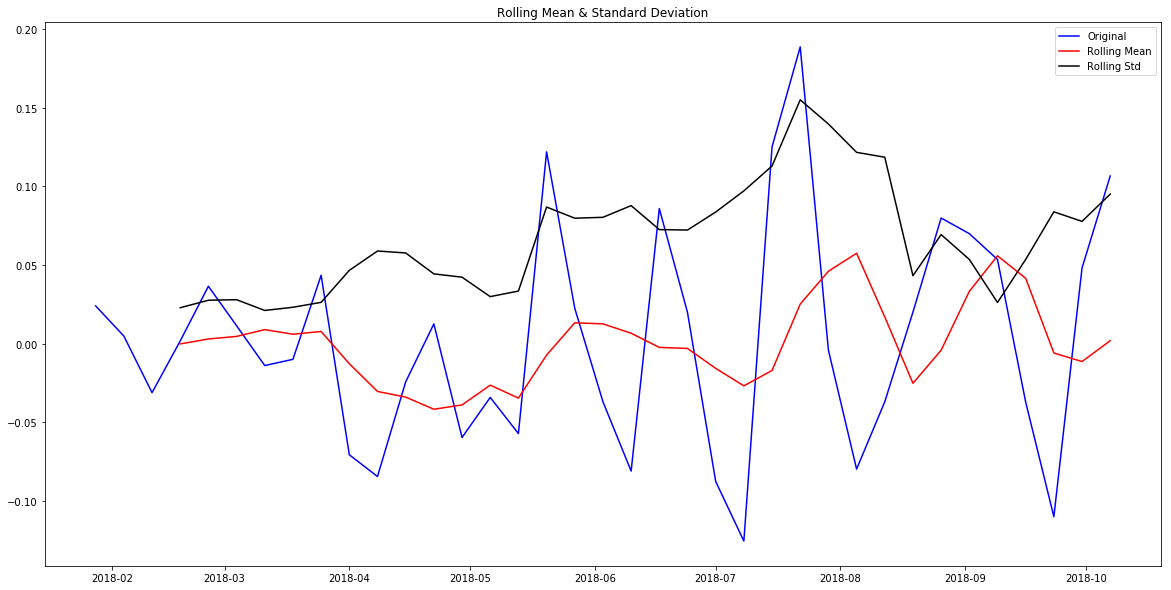

Results of Dickey-Fuller Test:
Test Statistic                -7.199029e+00
p-value                        2.392309e-10
#Lags Used                     1.000000e+00
Number of Observations Used    3.500000e+01
Critical Value (1%)           -3.632743e+00
Critical Value (5%)           -2.948510e+00
Critical Value (10%)          -2.613017e+00
dtype: float64


In [240]:
## since rolling mean window is = 4 so average is not availabe for first 4 weeks
train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)

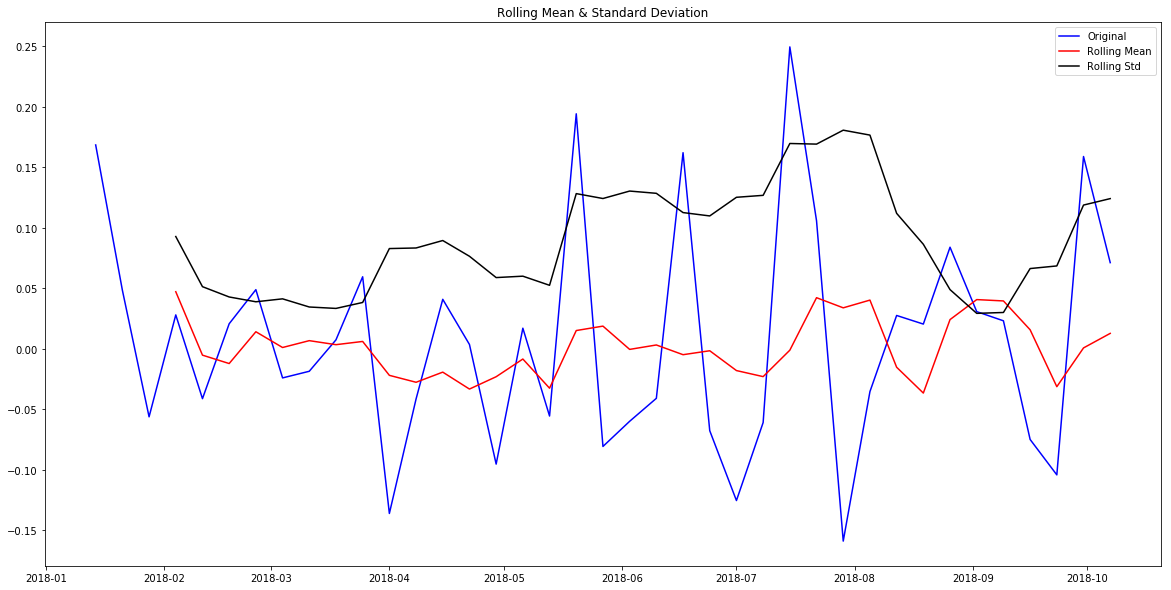

Results of Dickey-Fuller Test:
Test Statistic                -7.139077e+00
p-value                        3.360854e-10
#Lags Used                     2.000000e+00
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64


In [241]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

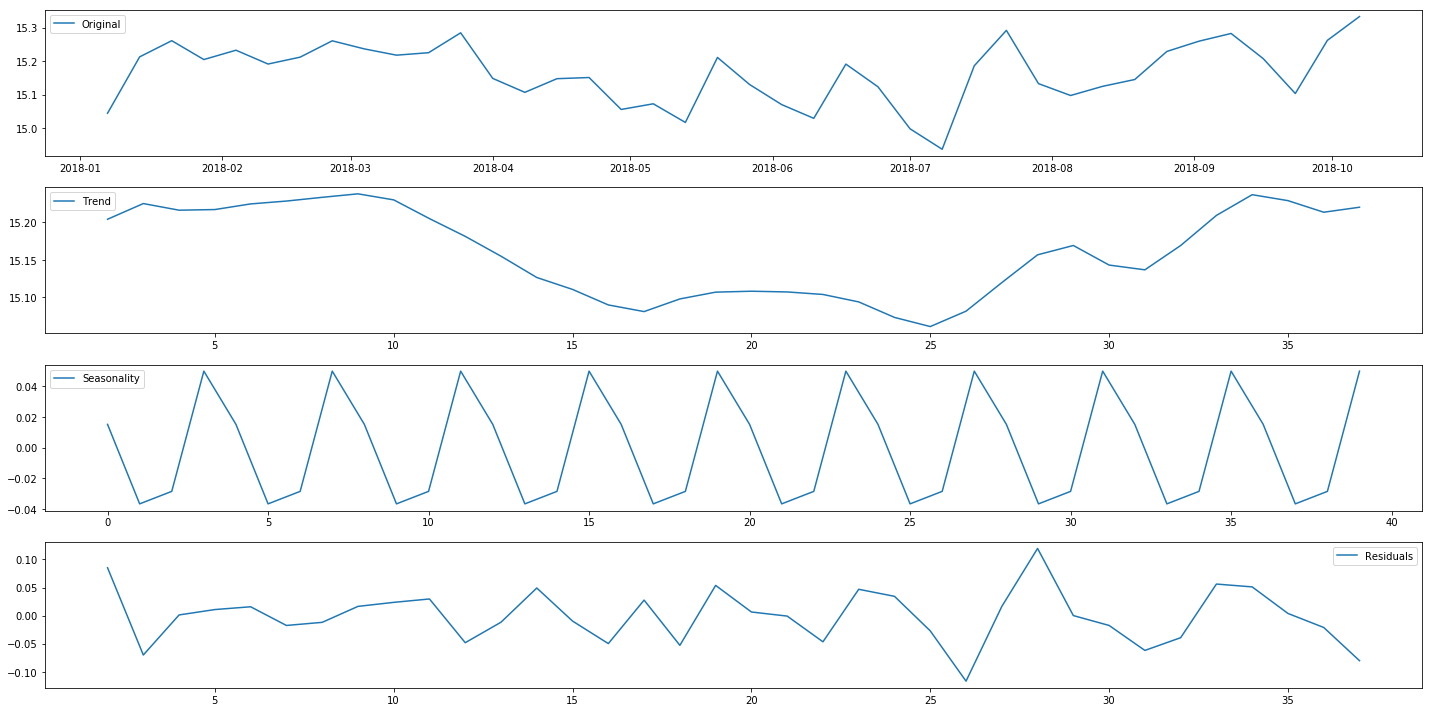

In [242]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Revenue.values, freq = 4) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()


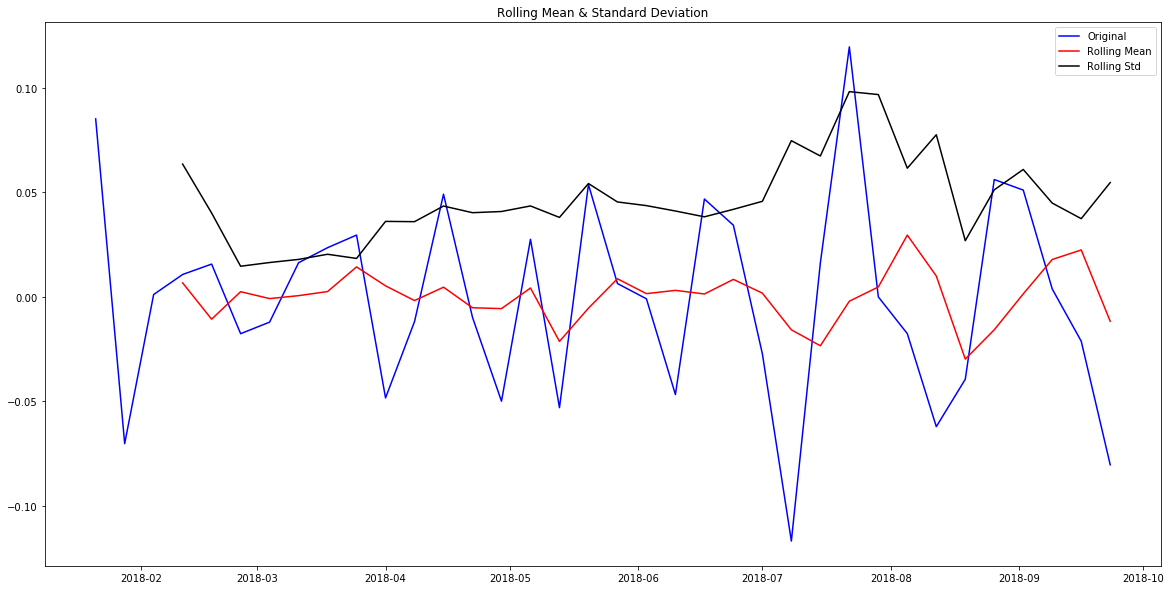

Results of Dickey-Fuller Test:
Test Statistic                 -5.395392
p-value                         0.000003
#Lags Used                      4.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [243]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

In [244]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=4) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=4, method='ols')

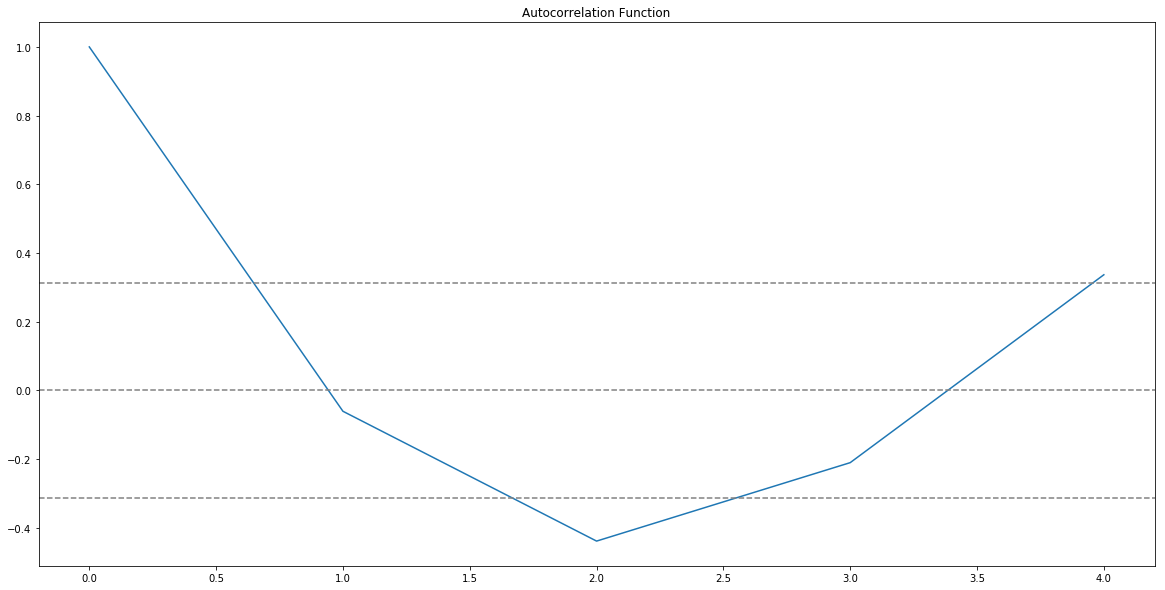

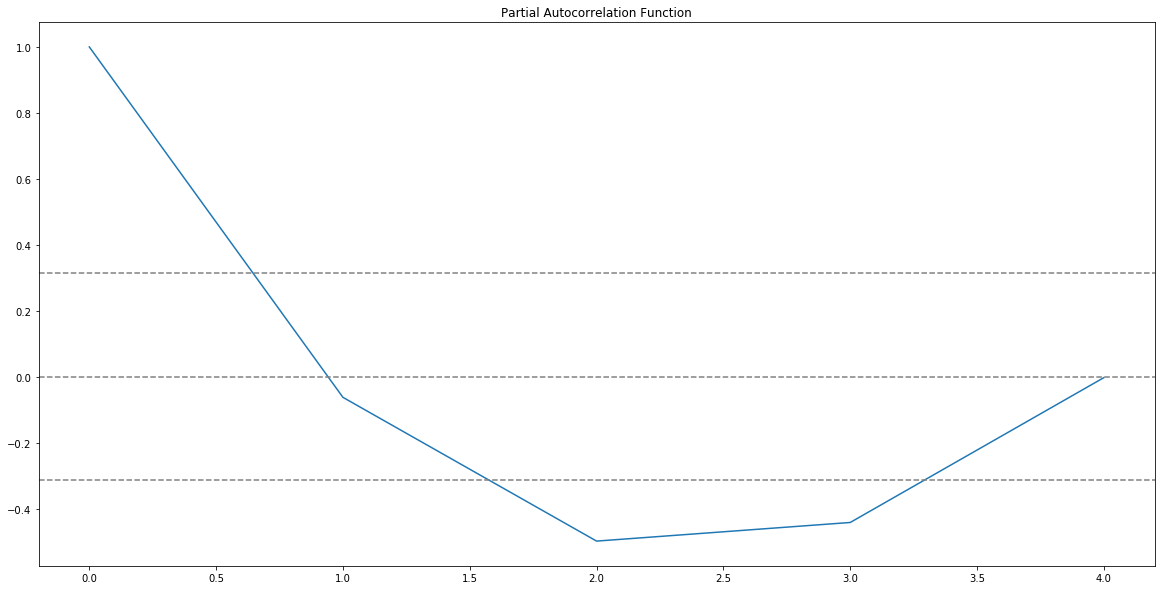

In [245]:
#ACF and PACF plot
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

In [249]:
Train_log

DateTime
2018-01-07    15.044115
2018-01-14    15.212394
2018-01-21    15.260687
2018-01-28    15.204397
2018-02-04    15.232297
2018-02-11    15.191003
2018-02-18    15.211575
2018-02-25    15.260323
2018-03-04    15.236176
2018-03-11    15.217509
2018-03-18    15.224790
2018-03-25    15.284185
2018-04-01    15.148069
2018-04-08    15.106503
2018-04-15    15.147276
2018-04-22    15.150745
2018-04-29    15.055393
2018-05-06    15.072306
2018-05-13    15.016673
2018-05-20    15.210678
2018-05-27    15.129906
2018-06-03    15.069923
2018-06-10    15.028906
2018-06-17    15.190793
2018-06-24    15.123034
2018-07-01    14.997584
2018-07-08    14.936571
2018-07-15    15.185839
2018-07-22    15.291477
2018-07-29    15.132536
2018-08-05    15.097072
2018-08-12    15.124506
2018-08-19    15.144827
2018-08-26    15.228639
2018-09-02    15.259234
2018-09-09    15.282262
2018-09-16    15.207259
2018-09-23    15.103014
2018-09-30    15.261741
2018-10-07    15.332806
Freq: W-SUN, Name: Revenue, dty

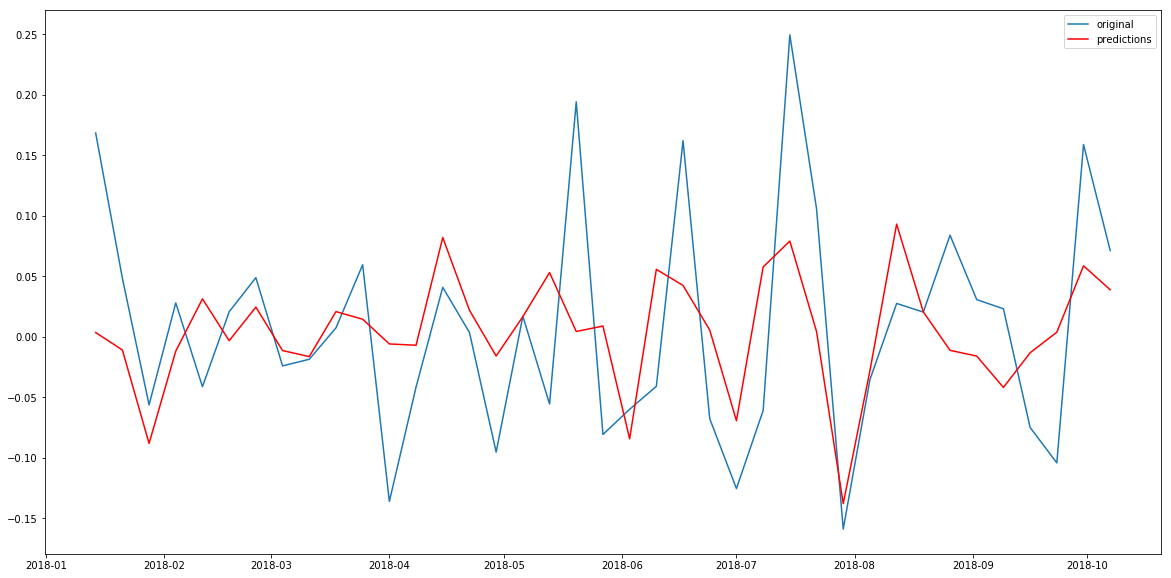

In [247]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()

In [248]:
AR_predict=results_AR.predict(start="2018-01-07", end="2018-10-07") 
#AR_predict=results_AR.predict()
AR_predict=AR_predict.cumsum().shift().fillna(0) 
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Revenue'])[0], index = valid.index) 
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
AR_predict = np.exp(AR_predict1)
plt.plot(valid['Revenue'], label = "Valid") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Revenue']))/valid.shape[0])) 
plt.show()

KeyError: '2018-01-07'

/Users/sulbha/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


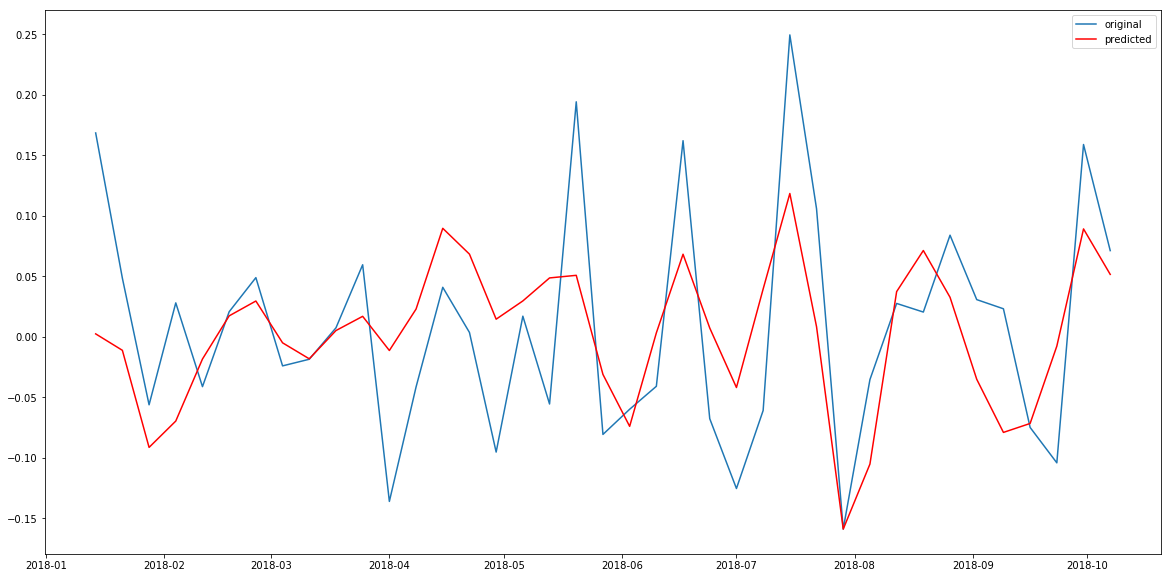

In [128]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original') 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted') 
plt.legend(loc='best') 
plt.show()

In [155]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Revenue'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    plt.plot(given_set['Revenue'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Revenue']))/given_set.shape[0]))
    plt.show()

def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
 
    plt.plot(given_set['Revenue'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Revenue']))/given_set.shape[0]))
    plt.show()

In [167]:
Train_log

Date
2018-01-07    15.044115
2018-01-14    15.212394
2018-01-21    15.260687
2018-01-28    15.204397
2018-02-04    15.232297
2018-02-11    15.191003
2018-02-18    15.211575
2018-02-25    15.260323
2018-03-04    15.236176
2018-03-11    15.217509
2018-03-18    15.224790
2018-03-25    15.284185
2018-04-01    15.148069
2018-04-08    15.106503
2018-04-15    15.147276
2018-04-22    15.150745
2018-04-29    15.055393
2018-05-06    15.072306
2018-05-13    15.016673
2018-05-20    15.210678
2018-05-27    15.129906
2018-06-03    15.069923
2018-06-10    15.028906
2018-06-17    15.190793
2018-06-24    15.123034
2018-07-01    14.997584
2018-07-08    14.936571
2018-07-15    15.185839
2018-07-22    15.291477
2018-07-29    15.132536
2018-08-05    15.097072
2018-08-12    15.124506
2018-08-19    15.144827
2018-08-26    15.228639
2018-09-02    15.259234
2018-09-09    15.282262
2018-09-16    15.207259
2018-09-23    15.103014
2018-09-30    15.261741
2018-10-07    15.332806
Freq: W-SUN, Name: Revenue, dtype: 

const              0.002297
ar.L1.D.Revenue    0.435340
ar.L2.D.Revenue   -0.683676
ma.L1.D.Revenue   -0.843857
ma.L2.D.Revenue    0.341913
dtype: float64

In [201]:
from pandas import datetime

startindex =  datetime.strptime('2018-01-07', '%Y-%m-%d').date()
s = datetime.combine(startindex ,datetime.time(datetime.now()))
s
#startindex = pd.to_datetime('2018-01-07').date()
#startindex
#ARIMA_predict_diff=results_ARIMA.predict( start= s )
#check_prediction_diff(ARIMA_predict_diff, valid)

datetime.datetime(2018, 1, 7, 8, 36, 25, 523298)

'0.9.0'

In [151]:
# build SARIMAX model: select the parameters (p,q,d,s)

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


In [63]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_weekly,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 4)4 - AIC:2006.2639079767882
ARIMA(0, 0, 0)x(0, 0, 1, 4)4 - AIC:1844.543255656013
ARIMA(0, 0, 0)x(0, 1, 0, 4)4 - AIC:1768.960364610306
ARIMA(0, 0, 0)x(0, 1, 1, 4)4 - AIC:1631.2813414596149
ARIMA(0, 0, 0)x(1, 0, 0, 4)4 - AIC:1799.408748673454
ARIMA(0, 0, 0)x(1, 0, 1, 4)4 - AIC:1760.000262933367
ARIMA(0, 0, 0)x(1, 1, 0, 4)4 - AIC:1666.9503756628592
ARIMA(0, 0, 0)x(1, 1, 1, 4)4 - AIC:1633.2130638473946
ARIMA(0, 0, 1)x(0, 0, 0, 4)4 - AIC:1938.7423832682605
ARIMA(0, 0, 1)x(0, 0, 1, 4)4 - AIC:1800.6591548929134
ARIMA(0, 0, 1)x(0, 1, 0, 4)4 - AIC:1735.2677964835777
ARIMA(0, 0, 1)x(0, 1, 1, 4)4 - AIC:1598.100023724196
ARIMA(0, 0, 1)x(1, 0, 0, 4)4 - AIC:1859.4159398089614
ARIMA(0, 0, 1)x(1, 0, 1, 4)4 - AIC:1794.9753410217327
ARIMA(0, 0, 1)x(1, 1, 0, 4)4 - AIC:1664.7791644440274
ARIMA(0, 0, 1)x(1, 1, 1, 4)4 - AIC:1599.970560415642
ARIMA(0, 1, 0)x(0, 0, 0, 4)4 - AIC:1842.8428271971247
ARIMA(0, 1, 0)x(0, 0, 1, 4)4 - AIC:1724.3428868234519
ARIMA(0, 1, 0)x(0, 1, 0, 4)4 - AIC

In [183]:
df_weekly

,Revenue
Date,
2018-01-07,3.416458e+06
2018-01-14,4.042583e+06
2018-01-21,4.242602e+06
2018-01-28,4.010381e+06
2018-02-04,4.123846e+06
2018-02-11,3.957023e+06
2018-02-18,4.039273e+06
2018-02-25,4.241056e+06
2018-03-04,4.139874e+06


In [184]:
#ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1111.4128994880725
#ARIMA(1, 1, 1)x(0, 1, 1, 4)4 - AIC:1580.0578567992804
    
mod = sm.tsa.statespace.SARIMAX(df_weekly,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4225      0.463      0.912      0.362      -0.485       1.330
ma.L1         -0.7017      0.348     -2.014      0.044      -1.385      -0.019
ar.S.L4       -0.6656      0.326     -2.042      0.041      -1.304      -0.027
ma.S.L4        0.3391      0.418      0.812      0.417      -0.480       1.158
sigma2      1.267e+11   1.52e-12   8.33e+22      0.000    1.27e+11    1.27e+11


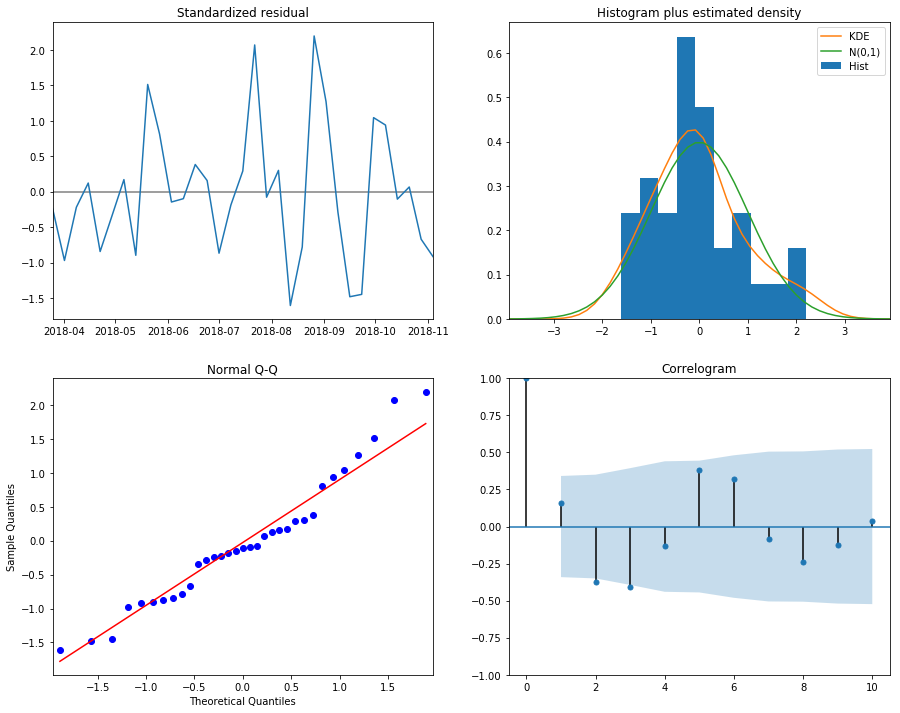

In [185]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [186]:
pred = results.get_prediction(start=pd.to_datetime('2018-10-07'), dynamic=False)
pred_ci = pred.conf_int()


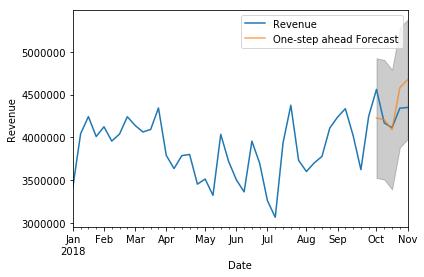

In [187]:
ax = df_weekly.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.legend()

plt.show()

In [188]:
y_forecasted = pred.predicted_mean
y_truth = df_weekly_sum['2018-10-07':]

In [189]:
list(y_forecasted.values)

[4225184.5260641389,
 4206366.1425178591,
 4090328.4497530023,
 4579670.3038113164,
 4675640.1645344496]

In [190]:
y = pd.DataFrame( (y_forecasted.values))
y.index = y_forecasted.index
y.columns = ['Revenue']
y.info()
#y['Date'] = pd.todatetime(y['Date'])
#y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2018-10-07 to 2018-11-04
Freq: W-SUN
Data columns (total 1 columns):
Revenue    5 non-null float64
dtypes: float64(1)
memory usage: 80.0 bytes


In [191]:
y_truth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2018-10-07 to 2018-11-04
Freq: W-SUN
Data columns (total 1 columns):
Revenue    5 non-null float64
dtypes: float64(1)
memory usage: 80.0 bytes


In [192]:
print (y_forecasted)
print (y_truth['Revenue'])

Date
2018-10-07    4.225185e+06
2018-10-14    4.206366e+06
2018-10-21    4.090328e+06
2018-10-28    4.579670e+06
2018-11-04    4.675640e+06
Freq: W-SUN, dtype: float64
Date
2018-10-07    31919135.66
2018-10-14    29182677.95
2018-10-21    28797072.50
2018-10-28    30385865.26
2018-11-04    13047717.03
Freq: W-SUN, Name: Revenue, dtype: float64


In [193]:
error = y_forecasted - y_truth['Revenue']

In [194]:
error

Date
2018-10-07   -2.769395e+07
2018-10-14   -2.497631e+07
2018-10-21   -2.470674e+07
2018-10-28   -2.580619e+07
2018-11-04   -8.372077e+06
Freq: W-SUN, dtype: float64

In [195]:
# Compute the mean square error
mse = (error ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 547449130327179.3


In [199]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-10-07'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [200]:
pred_dynamic_ci

,lower Revenue,upper Revenue
Date,,
2018-10-07,3.527614e+06,4.922755e+06
2018-10-14,3.105271e+06,4.825011e+06
2018-10-21,2.958388e+06,4.872721e+06
2018-10-28,3.368243e+06,5.432154e+06
2018-11-04,3.119762e+06,5.781975e+06


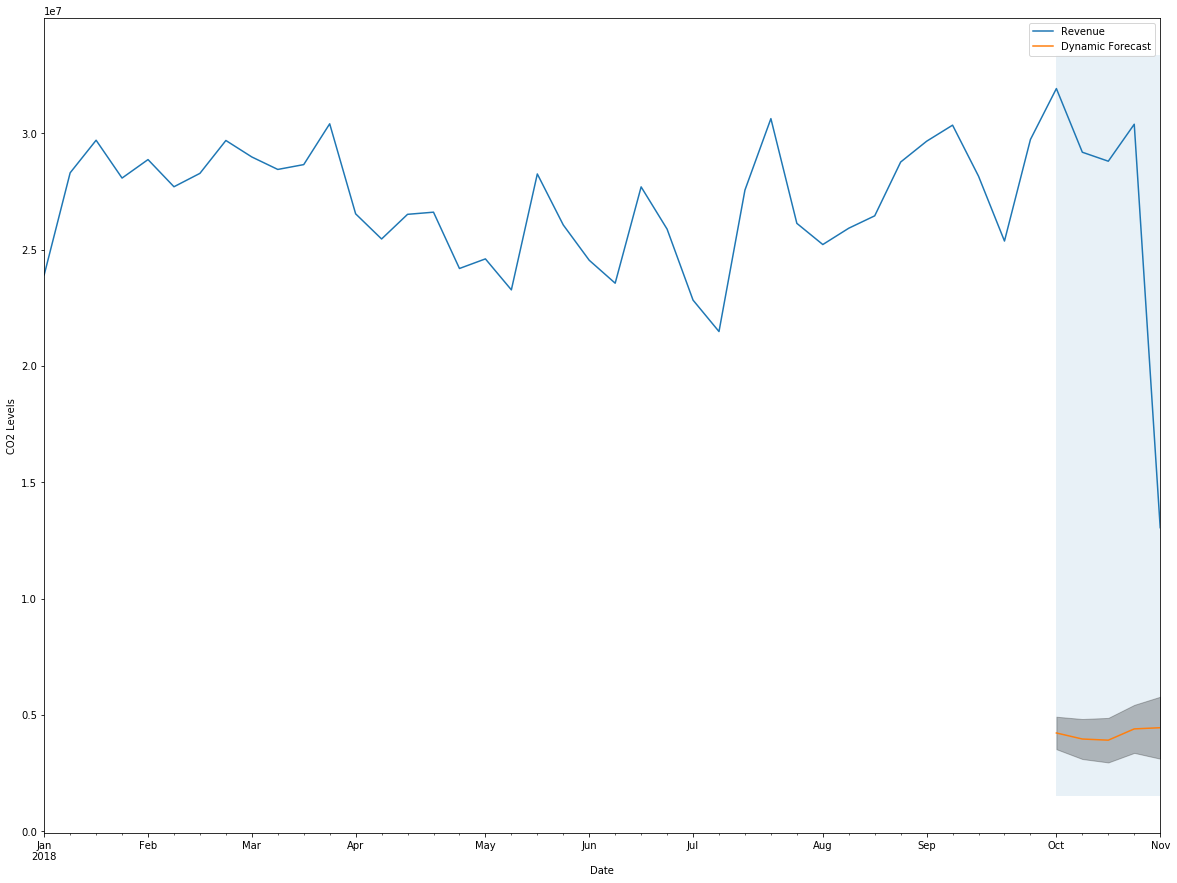

In [201]:
ax = df_weekly_sum.plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-10-07'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [202]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

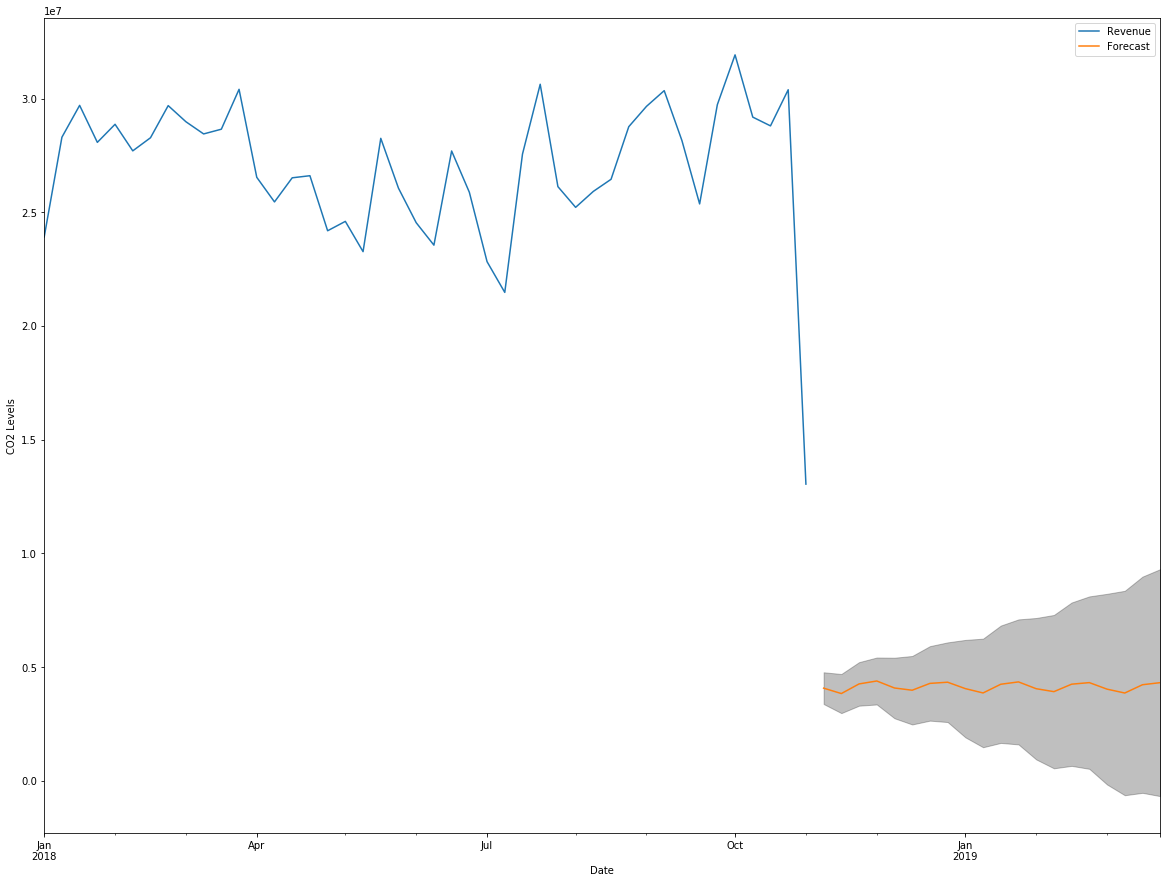

In [203]:
ax = df_weekly_sum.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()